# La procrastination est-elle optimale ?

Ce sujet est proposé par Pierre Matalon. Vous pouvez adresser vos questions ou remarques à pierre.matalon@polytechnique.edu.

> "Several studies have linked procrastination to individual performance, with the procrastinator performing more poorly overall, and to individual well-being, with the procrastinator being more miserable in the long term. For example, a survey indicated that procrastinating on taxes costs people on average $400 because of rushing and consequent errors, resulting in over $473 million in overpayments in 2002."

*The Nature of Procrastination: A Meta-Analytic and Theoretical Review of Quintessential Self-Regulatory Failure*, P. Steel, Psychological Bulletin, 2007.

L'idée de ce projet est de considérer les stratégies de répartition de la quantitié de travail dans le temps comme un problème de décision dynamique. 
A chaque instant, on choisit quelle quantité de travail fournir en essayant d'optimiser la conjonction d'effets opposés : la charge de travail restante diminue avec l'effort, mais la fatigue (et autres désagréments...) augmente.
On parle de procrastination lorsque l'essentiel du travail à faire est repoussé à la fin de l'horizon temporel admissible. 
L'objectif est de faire apparaître la procrastination comme stratégie *optimale* dans un tel problème, et ainsi montrer qu'il s'agit en fait d'un comportement rationnel qui émerge spontanément de l'optimisation d'une fonction de coût.

## Modélisation

Un devoir, correspondant à une charge de travail fixée $x_0>0$, doit être rendu à la date $T>0$. (Notez que ce n'est pas un devoir de mathématiques, sinon nous ne saurions envisager la procrastination.)
A chaque instant, l'étudiant choisit quelle quantité d'effort $u(t)$ fournir en fonction de la charge de travail restante $x(t)$ et de son état de fatigue $y(t)$.
Par simplicité, la variable $y(t)$ modélise sous une variable unique tous les effets négatifs liés à l'effort de travail (fatigue cognitive, aversion, etc.).

Nous avons donc deux variables d'état ($x$ et $y$) et une variable de contrôle ($u$).
Le travail $x$ est une fonction décroissante du temps: $x\in L^1([0,T])$ avec pour tout $t$, $x(t) \leq x_0$.
La fatigue $y\in L^1([0,T])$ démarre avec une fatigue initiale $y_0\geq 0$. 
En considérant que les capacités cérébrales sont bornées, l'effort $u\in L^\infty([0,T])$ prend ses valeurs dans l'intervalle admissible $[0,M]$, avec $M>0$.

Nous considérons que le système dynamique est gouverné par les équations différentielles suivantes :

$$
\begin{cases}
\dot{x}(t) = -u(t),                                      \\
\dot{y}(t) = \beta u(t) - \delta (1-\frac{u(t)}{M}) y(t),
\end{cases}
$$
avec les conditions initiales
$$
x(0) = x_0, \qquad y(0) = y_0.
$$

La première équation indique que le travail restant diminue proportionnellement à l'effort.
On notera donc que la tâche n'est faisable dans le temps imparti que si $x_0 \leq MT$.
Dans la seconde équation, le terme $\beta u(t)$ indique que fournir un effort augmente la fatigue, dont la quantité est convertie via un facteur constant $\beta \geq 0$.
Le second terme modélise un phénomène de récupération naturelle.
Plus l'effort est faible, plus on récupère, jusqu'à un maximum de $\delta y(t)$ en l'absence d'effort. $\delta \geq 0$ est le coefficient d'efficacité de la récupération. Notons que plus la fatigue est élevée, plus la récupération naturelle est efficace, et que la récupération est nulle lorsque l'effort est maximal.

La fonction de coût à minimiser est la suivante :

$$
J(u) = \int_0^T e^{-\rho t}\big(D(u(t)) + E(y(t))\big)\,dt + \Phi(x(T)),
$$
où
- $D(u(t))$ mesure le désagrément immédiat de l'effort.
- $E(y(t))$ mesure le coût de la fatigue.
- Le terme d'actualisation $e^{-\rho t}$, avec $\rho\geq 0$, reflète la préférence pour le présent, en faisant en sorte que les coûts immédiats comptent plus que les coûts futurs.
- $\Phi(x(T))$ pénalise le travail non terminé à la date limite.

$D$, $E$ et $\Phi$ sont des fonctions positives et croissantes.


## Travail à réaliser

### Question 1 : analyse
Appliquez le principe du minimum de Pontryagin (PMP) à ce problème. 
Montrez que si $D$ est strictement convexe, alors le contrôle optimal est unique.

### Correction

On dénote $X = (x,y)^\top$ le vecteur des variables d'état, et $p = (p_x, p_y)^\top$ l'état adjoint.
En utilisant les notations $f$, $g$ et $h$ telles que
$$
\begin{align*}
    \dot{X} &= f(t, X, u), \\ 
    J(u)    &= \int_0^T g(t, X(t), u(t))dt + h(X(T)),
\end{align*}
$$

le Hamitonien est défini par

$$
H(t, X, p, u) = p\cdot f(t, X, u) + g(t, X, u)
$$

et l'état adjoint vérifie les équations

$$
\begin{cases}
    \dot{p}(t) &= -\frac{\partial f}{\partial X}(t, X(t), u(t))p(t) - \frac{\partial g}{\partial X}(t, X(t), u(t)), \\
    p(T) &= \frac{\partial h}{\partial X}(X(T)).
\end{cases}
$$

Avec 
$$
f(t, X, u) = 
\begin{bmatrix}
    -u \\ 
    \beta u - \delta (1-\frac{u}{M}) y
\end{bmatrix}, 
\qquad
\frac{\partial f}{\partial X}(t, X, u) =
\begin{bmatrix}
    0 & 0 \\ 
    0 & -\delta(1-\frac{u}{M})
\end{bmatrix}, 
$$

$$
g(t, X, u) = e^{-\rho t}\big(D(u) + E(y)\big),
\qquad
\frac{\partial g}{\partial X}(t, X, u) = 
\begin{bmatrix}
    0 \\ 
    e^{-\rho t}E'(y)
\end{bmatrix}, 
$$

$$
h(X) = \Phi(x),
\qquad
\frac{\partial h}{\partial X}(t, X, u) = 
\begin{bmatrix}
    \Phi'(x) \\ 
    0
\end{bmatrix}, 
$$

on obtient donc

$$
H(t, X, p, u) = -p_x u + p_y(\beta u - \delta (1-\frac{u}{M})y) + e^{-\rho t}(D(u)+E(y))
$$
et les équations
$$
\begin{cases}
    \dot{p}_x(t) &= 0, \\
    \dot{p}_y(t) &= \delta(1-\frac{u(t)}{M}) p_y(t) - e^{-\rho t}E'(y(t)), \\
    p_x(T) &= \Phi'(x(T)), \\
    p_y(T) &= 0.
\end{cases}
$$

D'après le (PMP), le contrôle optimal $\overline{u}$ verifie, à tout instant $t$,

$$
\overline{u}(t) \in \argmin_{u\in [0,M]} H(t, \overline{X}, \overline{p}, u) = \argmin_{u\in [0,M]} (- \overline{p}_x + \overline{p}_y(\beta +\delta\frac{\overline{y}}{M}) )u + e^{-\rho t}D(u),
$$
où $\overline{X}$ est la trajectoire obtenue à partir de $\overline{u}$ (aussi dénotée $X_{\overline{u}}$) et $\overline{p}$ l'état adjoint correspondant.

### Question 2 : programmer en python la résolution numérique du problème

On pose 
$$
D(u) = \frac{\kappa}{2} u^2, \qquad E(y) = \frac{\gamma}{2} y^2, \qquad \Phi(x) = \frac{\mu}{2} x^2.
$$
où $\kappa$, $\gamma$, $\mu$ sont des paramètres constants et positifs.

Sous forme d'un notebook python, implémentez la résolution numérique du problème.
Seules les librairies `numpy` et `scipy` sont autorisées pour les calculs.

Dans un premier temps, on considérera abstraites les fonctions $D$, $E$ et $\Phi$ dans le code de résolution. 
On utilisera donc un algorithme numérique pour minimiser le Hamiltonien (la fonction `minimize_scalar` de `scipy` par exemple).
On pourra ensuite spécialiser le code pour le choix quadratique de la fonction $D$ afin d'accélérer les calculs.

Pour la résolution de l'équation différentielle ordinaire (EDO) à quatre inconnues issue du (PMP), 
on pourra utiliser la fonction `solve_ivp` de `scipy`.
Comme les états adjoints se résolvent en condition finale, implémenter une méthode de tir sera nécessaire pour déterminer leurs valeurs initiales.
La méthode fonctionne de la façon suivante : on considère l'équation générale
$$
    \dot{z}(t) = f(t,z)
$$

avec condition finale 
$$
z(T) = \alpha,
$$
où $\alpha$ est donné.
Pour tout $\theta$, on note $z_\theta$ la solution du problème de Cauchy composé de l'équation $\dot{z}(t) = f(t,z)$ et de la condition initiale $z(0) = \theta$.
Soit la fonction $R$ définie par $R(\theta) = z_\theta(T)-\alpha$ (c'est-à-dire le résidu sur la condition finale). 
On cherche donc $\theta^*$ telle que $R(\theta^*) = 0$.
Un algorithme "de type" Newton pour la recherche de racine sera utilisé.
On pourra notamment appeler la fonction `root` de `scipy`.
L'appellation "méthode de tir" vient du caractère itératif de ces algorithmes : 
à partir d'une première valeur arbitraire $\theta_0$ de la condition initiale, le résidu $z_{\theta_0}(T)-\alpha$ sur la condition finale est calculé, puis le "tir" est réajusté avec une nouvelle valeur $\theta_1$, et ce jusqu'à convergence.

Une fois les conditions initiales des états adjoints calculées, l'EDO est intégrée. 
Pour finir, le contrôle optimal est recalculé en post-processing, à partir des états optimaux.

Affichez les graphes des variables d'état, de contrôle, et des états adjoints en fonction du temps, pour la solution optimale.
Vérifiez que la procrastination apparaît comme stratégie optimale avec la configuration suivante :
le problème est défini par les valeurs $T=3, x_0=100, y_0=0, M=70$, 
les équations d'évolution par $\beta = 0.8, \delta = 0.2$,
 et la fonction de coût par $\rho = 1, \kappa=1, \gamma=1, \mu=50$.

## Résolution numérique

In [ ]:
import numpy as np
from scipy.optimize import minimize_scalar, least_squares, root
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [ ]:
# --- Parameters ---
T     = 3   # final time
x0    = 100 # total workload
y0    = 0   # initial fatigue
M     = 70  # maximum effort

beta  = 0.8 # fatigue factor (how much fatigue increases with effort)
delta = 0.2 # recovery factor (how much fatigue diminishes with time in the absence of effort)

rho   =  1  # actualization factor (preference for the present over the future)
kappa =  1  # weight of the control cost
gamma =  1  # weight of the fatigue cost
mu    = 50 # weight of the final workload cost

control_cost_function = 'quadratic'  # ''quadratic', linear'

# --- D ---
if control_cost_function == 'quadratic':
    def D(u):
        return kappa * 0.5 * u**2 # quadratic cost --> smooth control
elif control_cost_function == 'linear':
    def D(u):
        return kappa * u # linear cost --> bang-bang control

# --- E and E' ---
def E(y):
    return gamma * 0.5 * y**2

def diffE(y):
    return gamma * y

# --- Phi and Phi' ---
def Phi(x):
    return mu * 0.5 * x**2

def diffPhi(x):
    return mu * x


### EDO à 4 inconnues

D'après le (PMP), on veut résoudre l'EDO à quatre inconnues

$$
\begin{cases}
    \dot{x}(t) &= -u(t),                    \\
    \dot{y}(t) &= \beta u(t) - \delta (1-\frac{u(t)}{M}) y(t), \\
    \dot{p}_x(t) &= 0, \\
    \dot{p}_y(t) &= \delta (1-\frac{u(t)}{M}) p_y(t) - e^{-\rho t}E'(y(t)), \\
\end{cases}
$$
avec les conditions initiales
$$
x(0) = x_0, \qquad y(0) = y_0
$$
et les conditions finales
$$
p_x(T) = \Phi'(x(T)), \qquad p_y(T) = 0.
$$

In [ ]:
def minimize_H(t, x, y, px, py):    
    """ Minimize the Hamiltonian w.r.t. u at time t. """
    
    # --- Hamiltonian ---
    def H(u):
        return (- px + py * (beta + delta *y/M) ) * u + np.exp(-rho * t) * D(u)
    
    # --- Minimize H ---
    if control_cost_function == 'linear':
        if (- px + py * (beta + delta *y/M) ) + np.exp(-rho * t) * kappa < 0:
            return M
        else:
            return 0.0
    elif control_cost_function == 'quadratic':
        u_free = (np.exp(rho * t) / kappa) * (px - py * (beta + (delta / M) * y))
        return np.clip(u_free, 0.0, M) # Projection onto [0, M]
    else:
        result = minimize_scalar(H, bounds=(0, M), method='bounded', options={'xatol':1e-8})
        return result.x

def EDO(t, z):
    x  = z[0]
    y  = z[1]
    px = z[2]
    py = z[3]

    # --- Optimal control ---
    u = minimize_H(t, x, y, px, py)

    # --- State equations ---
    dxdt = -u
    dydt = beta * u - delta * (1-u/M) * y

    # --- Adjoint equations ---
    dpxdt = 0.0
    dpydt = delta * (1-u/M) * py - np.exp(-rho * t) * diffE(y)

    return np.array([dxdt, dydt, dpxdt, dpydt])

In [ ]:
n_time_steps = 100
def integrate_ODE(px0, py0):
    """ Integrate the ODE system forward in time. """
    sol = solve_ivp(EDO, [0, T], [x0, y0, px0, py0], t_eval=np.linspace(0, T, n_time_steps), rtol=1e-9, atol=1e-10) # method='DOP853', 
    return sol.t, sol.y[0], sol.y[1], sol.y[2], sol.y[3]

### Conditions initiales adjointes par la méthode de tir

On sait seulement résoudre une EDO à partir de conditions initiales (système de Cauchy).
On se ramène à ce cas-là en utilisant la "méthode de tir" pour déterminer $(p_x(0), p_y(0))$.

Voici la méthode en considérant l'équation générale 
$$
\begin{equation}
\dot{z}(t) = f(t,z)
\end{equation}
$$ 
avec condition finale 
$$
z(T) = \alpha,
$$
où $\alpha$ est donné.

Pour tout $\theta$, on note $z_\theta$ la solution du problème de Cauchy composé de l'équation $(1)$ et de la condition initiale $z(0) = \theta$.
Soit la fonction $R$ définie par $R(\theta) = z_\theta(T)-\alpha$. On cherche donc $\theta^*$ telle que $R(\theta^*) = 0$. On utilise la fonction `root` de `scipy` pour résoudre cette équation.

In [ ]:
def shooting_residual(p0):
    """ Compute the residual for the shooting method. """
    [t, x, y, px, py] = integrate_ODE(p0[0], p0[1])

    res_px = px[-1] - diffPhi(x[-1])
    res_py = py[-1]

    return np.array([res_px, res_py])

Résolution des conditions initiales $(p_x(0), p_y(0))$ par la méthode de tir :

In [ ]:
theta0 = np.array([0, 0])
result = root(shooting_residual, theta0, method='broyden1', options={'disp': True, 'maxiter':1000})

px0, py0 = result.x[0], result.x[1]

if not result.success:
    raise RuntimeError("The shooting method failed: " + result.message)

print("Final residual norm: ", np.linalg.norm(shooting_residual([px0, py0])))
print("Optimal initial adjoints: px0 = ", px0, ", py0 = ", py0)

0:  |F(x)| = 5000.5; step 1
1:  |F(x)| = 4675.44; step 0.00606422
2:  |F(x)| = 3373.04; step 1
3:  |F(x)| = 1538.33; step 0.2255
4:  |F(x)| = 1417.92; step 0.0473218
5:  |F(x)| = 930.174; step 1
6:  |F(x)| = 298.425; step 1
7:  |F(x)| = 55.2306; step 1
8:  |F(x)| = 7.75054; step 1
9:  |F(x)| = 7.76227; step 1
10:  |F(x)| = 7.76302; step 1
11:  |F(x)| = 7.79046; step 1
12:  |F(x)| = 4.30809; step 1
13:  |F(x)| = 5.97536; step 1
14:  |F(x)| = 5.04186; step 1
15:  |F(x)| = 3.2643; step 1
16:  |F(x)| = 3.63321; step 1
17:  |F(x)| = 3.36276; step 1
18:  |F(x)| = 2.12086; step 1
19:  |F(x)| = 2.02073; step 1
20:  |F(x)| = 2.13762; step 1
21:  |F(x)| = 1.13003; step 1
22:  |F(x)| = 1.00731; step 1
23:  |F(x)| = 1.17466; step 1
24:  |F(x)| = 0.518453; step 1
25:  |F(x)| = 0.387766; step 1
26:  |F(x)| = 0.787168; step 1
27:  |F(x)| = 0.10045; step 1
28:  |F(x)| = 0.186652; step 1
29:  |F(x)| = 0.125517; step 1
30:  |F(x)| = 0.0551976; step 1
31:  |F(x)| = 0.0167942; step 1
32:  |F(x)| = 0.00282

### Intégration du système

In [ ]:
# Integrate the ODE
t, x, y, px, py = integrate_ODE(px0, py0)

# Compute the optimal control u over time
u = np.array([minimize_H(ti, xi, yi, pxi, pyi) for ti, xi, yi, pxi, pyi in zip(t, x, y, px, py)])

# Compute instantaneous cost function over time
effort_cost = np.exp(-rho * t) * D(u)
fatigue_cost = np.exp(-rho * t) * E(y)
unfinished_workload_cost = Phi(x[-1])
total_cost = effort_cost + fatigue_cost
total_cost[-1] += unfinished_workload_cost  # add final workload cost only at the end

### Affichage des résultats

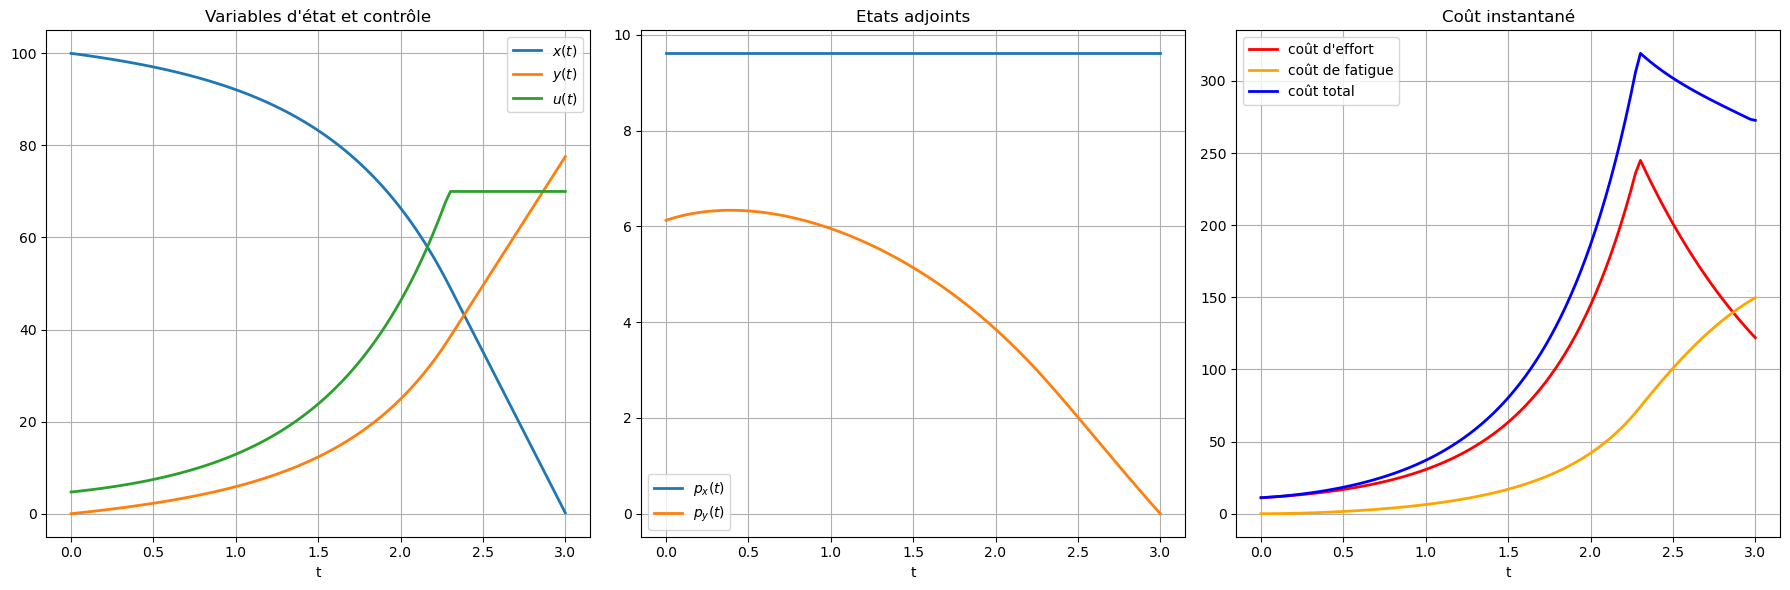

In [ ]:
# Plot the results
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.plot(t, x, label='$x(t)$', linewidth=2)
plt.plot(t, y, label='$y(t)$', linewidth=2)
plt.plot(t, u, label='$u(t)$', linewidth=2)
plt.xlabel('t')
plt.title('Variables d\'état et contrôle')
plt.grid()
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(t, px, label='$p_x(t)$', linewidth=2)
plt.plot(t, py, label='$p_y(t)$', linewidth=2)
plt.xlabel('t')
plt.title('Etats adjoints')
plt.grid()
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(t, effort_cost, label='coût d\'effort', linewidth=2, color='red')
plt.plot(t, fatigue_cost, label='coût de fatigue', linewidth=2, color='orange')
plt.plot(t, total_cost, label='coût total', linewidth=2, color='blue')
plt.xlabel('t')
plt.title('Coût instantané')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

### Question 3
Que mesurent les états adjoints dans ce problème ? Interpréter leurs courbes d'évolution dans la solution optimale.

### Correction

De façon générale, la valeur instantanée d'un état adjoint correspond à l'influence de la variable d'état associée sur les coûts futurs. 
Dans la fonction de coût, $x$ n'apparaît que dans la pénalisation du travail non terminé à l'instant final. $p_x$ correspond à la pression exercée par la deadline, qui ne varie pas tout au long de l'intervalle de temps.

$p_y$ est élevée au début puis décroît vers 0. Cela indique que travailler tôt aura au final un coût de fatigue élevé. En effet, la fatigue qui s'accumule se paye jusqu'au bout, seulement mitigée par la récupération. Plus le temps passe, moins la fatigue se paye car moins il reste de temps.

Le fait que $p_x$ soit très supérieur à $p_y$ à la fin induit un effet "urgence".

### Question 4
Le paramètre $\rho$ simule l'aspect psychologique lié à la préférence naturelle pour le présent. 
Passez-le à 0, et constatez que la stratégie optimale est toujours de travailler au maximum à la fin, même si dans une moindre mesure. 
En déduire que $\rho$ n'est pas le seul facteur poussant à la procrastination.
Quels sont alors les paramètres sur lesquels vous pouvez jouer pour obtenir une répartition plus équilibrée de l'effort ?

### Correction

Même en annulant $\rho$, la stratégie optimale présente toujours un plateau (certes petit) d'effort à la fin.
Ce comportement est inhérent à la dynamique du problème via la modélisation de la fatigue. Comme la fatigue accumulée tôt se paye tout le reste du temps, il est plus avantageux de se fatiguer tard.
On peut constater, en augmentant la vitesse de récupération $\delta$ ou en réduisant à 1 le poids $\gamma$ de la fatigue dans le coût, une meilleure répartition de l'effort.

On conclut que la procrastination n’est pas nécessairement due à une préférence pour le présent.
Elle peut émerger d’un arbitrage purement rationnel entre effort immédiat et fatigue future.

### Question 5
Reprenez le paramétrage de la question 2 et remplacez $D$ par la fonction $D(u) = \kappa u$. Que pouvez-vous dire sur le contrôle optimal ? Que constatez-vous concernant l'efficacité de la méthode de tir ? Expliquez.

### Correction

On constate que la méthode tir n'arrive pas à converger.

$D$ étant linéaire, le Hamiltonien devient linéaire en $u$ et le minimum est à chaque instant atteint sur l'une des bornes. Cela induit un contrôle de type bang-bang.

La fonction `root` implémente un algorithme the type Newton, qui requiert que la fonction dont on cherche le 0 soit $\mathcal{C}^1$ (on rappelle que ces algorithmes utilisent la matrice jacobienne). 
Or, le fait que $u$ soit discontinue casse cette propriété, et la méthode ne converge plus. 

### Question 6 (bonus)

Afin de parvenir à résoudre le problème dans ce cas difficile, implémentez la méthode d'homotopie suivante.
Pour $\epsilon \in [0,1]$, on pose 
$$
D_\varepsilon(u) = \kappa \left( (1-\varepsilon) u + \varepsilon \frac{1}{2}u^2 \right) .
$$
L'idée est de résoudre le problème pour $\varepsilon = 1$ (cas quadratique), puis de diminuer progressivement $\varepsilon$, en utilisant à chaque étape la solution précédente comme condition initiale pour la méthode de tir.
Lorsque la fonction `root` ne parvient pas à converger, diminuez la taille du pas sur $\varepsilon$ et recommencez.
Notez qu'il sera difficile d'atteindre un $\varepsilon$ très bas, donc arrêtez lorsque `root` ne converge plus même pour des pas très petits.

In [2165]:
raise RuntimeError("Stopping notebook execution here because the following is costly. Comment out this line to proceed when you've reached this part of the project.")

def D(u, eps):
    return kappa * ((1-eps) * u + eps * 0.5 * u**2) # homotopy between linear and quadratic

def minimize_H(t, x, y, px, py, eps):    
    """ Minimize the Hamiltonian w.r.t. u at time t, adjoint (px,py). """
    
    # --- Hamiltonian ---
    # H(u) = (- px + py * (beta + delta *y/M) ) * u + np.exp(-rho * t) * kappa * ((1-eps) * u + eps * 0.5 * u**2)

    # compute the minimizer of H directly, given the homotopy D
    u_free = (np.exp(rho * t) / (kappa * eps)) * (px - py * (beta + (delta / M) * y)) - (1 - eps) / eps
    return float(np.clip(u_free, 0.0, M)) # Projection onto [0, M]

def EDO(t, z, eps):
    x  = z[0]
    y  = z[1]
    px = z[2]
    py = z[3]

    # --- Optimal control ---
    u = minimize_H(t, x, y, px, py, eps)

    # --- State equations ---
    dxdt = -u
    dydt = beta * u - delta * (1-u/M) * y

    # --- Adjoint equations ---
    dpxdt = 0.0
    dpydt = delta * (1-u/M) * py - np.exp(-rho * t) * diffE(y)

    return np.array([dxdt, dydt, dpxdt, dpydt])

n_time_steps = 1000
def integrate_ODE(px0, py0, eps):
    """ Integrate the ODE system forward in time. """
    sol = solve_ivp(lambda t, z: EDO(t, z, eps), [0, T], [x0, y0, px0, py0], t_eval=np.linspace(0, T, n_time_steps), rtol=1e-9, atol=1e-10, first_step=1e-5) # method='DOP853',
    return sol.t, sol.y[0], sol.y[1], sol.y[2], sol.y[3]

def shooting_residual(p0, eps):
    """ Compute the residual for the shooting method. """
    [t, x, y, px, py] = integrate_ODE(p0[0], p0[1], eps)

    res_px = px[-1] - diffPhi(x[-1])
    res_py = py[-1]

    return np.array([res_px, res_py])

RuntimeError: Stopping notebook execution here because the following is costly. Comment out this line to proceed when you've reached this part of the project.

In [ ]:
eps = 1
tentative_eps = eps
reduction_factor = 0.9
max_failures = 5
failures = 0

theta = np.array([0, 0])

i = 0
while eps >= 1e-2:
    i += 1
    print(i, " - eps = ", eps, ", tentative_eps = ", tentative_eps, ", reduction_factor = ", reduction_factor)
    result = root(lambda p: shooting_residual(p, tentative_eps), theta, method='broyden1', options={'fatol': min(eps, 1e-2), 'maxiter':400})

    if not result.success:
        failures += 1
        print("The shooting method failed (residual=", np.linalg.norm(shooting_residual(theta, tentative_eps)), ", '" + result.message + "', failures=", failures, "), reducing eps more slowly.")
        if failures == max_failures:
            print("Too many failures, stopping the homotopy.")
            break
        reduction_factor = reduction_factor + 0.5*(1 - reduction_factor)
        tentative_eps = eps*reduction_factor
        continue

    # continue reducing eps
    failures = 0

    theta = result.x
    eps = tentative_eps

    reduction_factor = reduction_factor - 0.5*(1 - reduction_factor)
    reduction_factor = max(reduction_factor, 0.5)
    
    #print("Optimal initial adjoints: px0 = ", px0, ", py0 = ", py0)
    tentative_eps = eps*reduction_factor


print("Final homotopy parameter eps = ", eps)
px0, py0 = theta[0], theta[1]

1  - eps =  1 , tentative_eps =  1 , reduction_factor =  0.9
2  - eps =  1 , tentative_eps =  0.8500000000000001 , reduction_factor =  0.8500000000000001
3  - eps =  0.8500000000000001 , tentative_eps =  0.6587500000000002 , reduction_factor =  0.7750000000000001
4  - eps =  0.6587500000000002 , tentative_eps =  0.43642187500000024 , reduction_factor =  0.6625000000000002
5  - eps =  0.43642187500000024 , tentative_eps =  0.21821093750000012 , reduction_factor =  0.5
6  - eps =  0.21821093750000012 , tentative_eps =  0.10910546875000006 , reduction_factor =  0.5
7  - eps =  0.10910546875000006 , tentative_eps =  0.05455273437500003 , reduction_factor =  0.5
8  - eps =  0.05455273437500003 , tentative_eps =  0.027276367187500015 , reduction_factor =  0.5
9  - eps =  0.027276367187500015 , tentative_eps =  0.013638183593750007 , reduction_factor =  0.5
The shooting method failed (residual= 1539.1589846225488 , 'The maximum number of iterations allowed has been reached.', failures= 1 ), r

In [ ]:
# Integrate the ODE
t, x, y, px, py = integrate_ODE(px0, py0, eps)

# Compute the optimal control u over time
u = np.array([minimize_H(ti, xi, yi, pxi, pyi, eps) for ti, xi, yi, pxi, pyi in zip(t, x, y, px, py)])

# Compute instantaneous cost function over time
effort_cost = np.exp(-rho * t) * D(u, eps)
fatigue_cost = np.exp(-rho * t) * E(y)
unfinished_workload_cost = Phi(x[-1])
total_cost = effort_cost + fatigue_cost
total_cost[-1] += unfinished_workload_cost  # add final workload cost only at the end

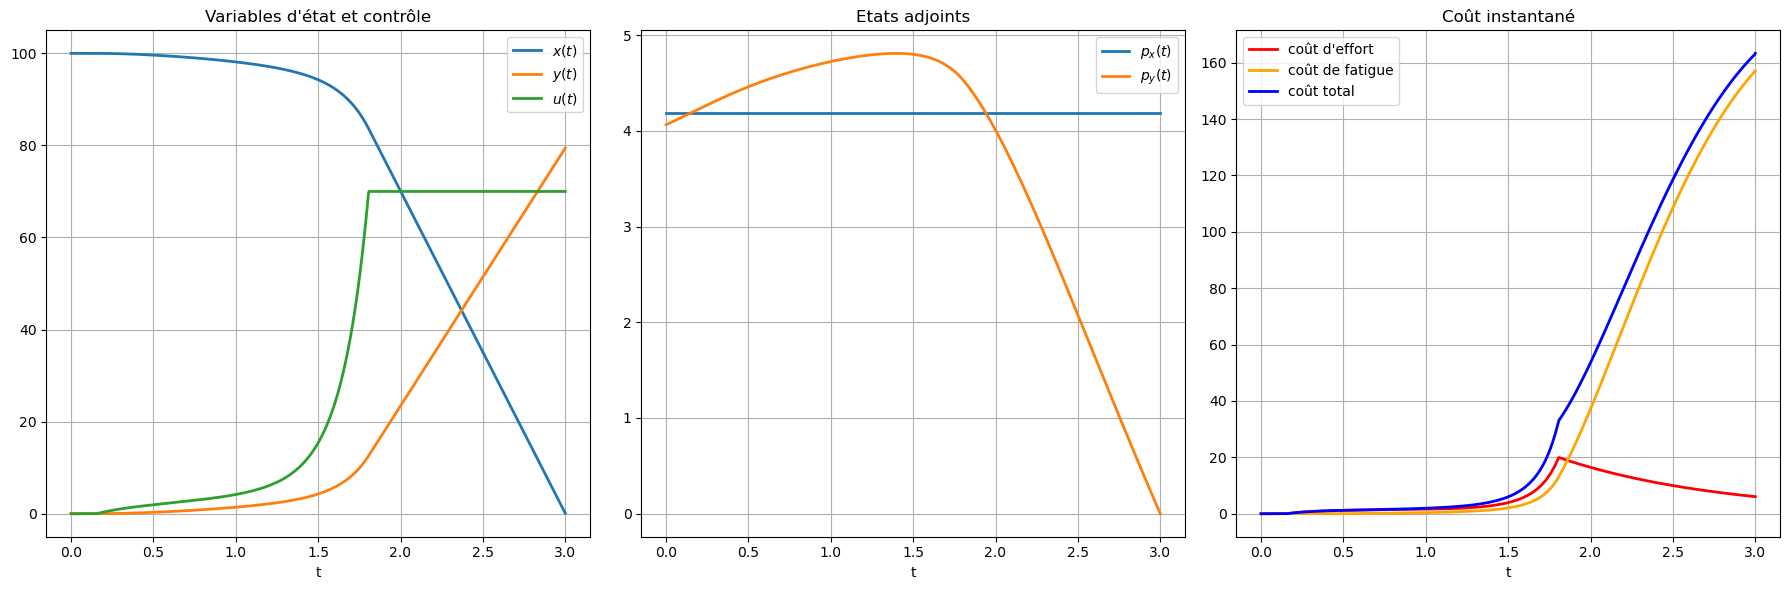

In [ ]:
# Plot the results
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.plot(t, x, label='$x(t)$', linewidth=2)
plt.plot(t, y, label='$y(t)$', linewidth=2)
plt.plot(t, u, label='$u(t)$', linewidth=2)
plt.xlabel('t')
plt.title('Variables d\'état et contrôle')
plt.grid()
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(t, px, label='$p_x(t)$', linewidth=2)
plt.plot(t, py, label='$p_y(t)$', linewidth=2)
plt.xlabel('t')
plt.title('Etats adjoints')
plt.grid()
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(t, effort_cost, label='coût d\'effort', linewidth=2, color='red')
plt.plot(t, fatigue_cost, label='coût de fatigue', linewidth=2, color='orange')
plt.plot(t, total_cost, label='coût total', linewidth=2, color='blue')
plt.xlabel('t')
plt.title('Coût instantané')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()